id : X
name: Gilad X
homework #1 image processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [ ]:
##just for image download
import urllib.request

image_url = 'https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201902/MIMIC-CXR-Chest-X-Ray-00_0.jpeg?itok=5bs7IlJ7'
image_path = 'xray.jpg'
urllib.request.urlretrieve(image_url , image_path)

('xray.jpg', <http.client.HTTPMessage at 0x7f456e2e4c90>)

In [ ]:
image = plt.imread(image_path).astype(float)


In [ ]:
def plot_image(image):  ## func to dispaly hte image , after clipping to normal levels , using 0-255 as values , and greyscale.
  image = np.clip(image , 0 ,255)
  image = image.astype(np.uint8)
  plt.imshow(image , cmap ='gray')
  plt.show()

In [ ]:
image.shape

(352, 498, 3)

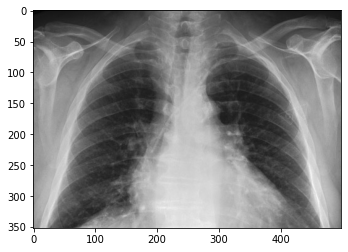

In [ ]:
plot_image(image)

In [ ]:
def rgb2gray(rgb_image):
  r , g , b = rgb_image[:,:,0] , rgb_image[:,:,1] , rgb_image[:,:,2]
  gray_image = 0.2989 * r + 0.5870 * g + 0.1140 * b

  return gray_image

In [ ]:
my_gray_img = rgb2gray(image)

In [ ]:
my_gray_img.shape

(352, 498)

In [ ]:
def getBrightness (image):  # input image (grey) return brighness by pixel-by-pixel calc
  row , col = image.shape    # also return lowest and heighest pixel brightness
  row = row
  col= col
  brightness = 0
  low = 255
  high = 0
  pix_count = 0
  print(range(col))
  print(range(row))
  for row in range(row):
    for col in range(col):
     # print("i is:"+str(i) + " j is:"+str(j) + " pixel is:"+ str(image[row-1,col-1]))
      pix_count+=1
    #  print("row:"+str(row)+" col:"+str(col))
      brightness += image[row][col]
      if row == 0 and col==0 : print("0 is ok")
      if row == 250 and col==141 : print("max  is ok")
      if high < image[row][col]  :
        high = image[row][col]
      #  print(high)
      if low > image[row][col]   :
        low = image[row][col]
      # print(low)
  brightness = (brightness/(row*col))
  result = "brightness:"+ str(brightness) + "  min:" + str(low) + "  max:" + str(high) + " pixcount:" + str(pix_count)
  return result



In [ ]:
my_gray_img.max() , my_gray_img.mean() , my_gray_img.min()

(250.9749, 124.29326191527473, 4.999499999999999)

In [ ]:
print (getBrightness(my_gray_img))

range(0, 498)
range(0, 352)
0 is ok
max  is ok
brightness:246.0820140654901  min:4.999499999999999  max:229.977 pixcount:113520


In [ ]:
print(my_gray_img)

[[  8.9991  11.9988  12.9987 ...  20.9979  23.9375  21.1658]
 [  9.999   11.9988  10.9989 ...  21.9978  18.9811  19.2091]
 [  8.9991  10.9989  10.9989 ...  21.9978  23.1378  25.1376]
 ...
 [144.9855 145.9854 145.9854 ... 119.988  115.9668 115.9668]
 [144.9855 145.9854 145.9854 ... 118.9881 114.2767 114.2767]
 [143.9856 145.9854 145.9854 ... 117.9882 113.7005 108.2989]]


In [ ]:
def getBright(image):
  row,col = image.shape
  bright = 0
  high = 0
  low = 255
  pix_count = 0
  for i in range(row):
    for j in range(col):
      bright+= image[i][j]
      pix_count+=1
      if low> image[i][j] : low = image[i][j]
      if high<image[i][j] : high = image[i][j]

  bright = bright/(row*col)

  result = "brightness:"+ str(bright) + "  min:" + str(low) + "  max:" + str(high) + " pixcount:" + str(pix_count)
  return result


In [ ]:
print(getBright(my_gray_img))

brightness:124.29326191528705  min:4.999499999999999  max:250.9749 pixcount:175296


In [ ]:
def brightness_changer(image,b):
  row,col = image.shape
  bright = 0
  high = 0
  low = 255
  pix_count = 0
  newb = b-image.mean()
  for i in range(row):
    for j in range(col):
       image[i][j] +=newb
  image = np.clip(image , 0 ,255)
  image = image.astype(np.uint8)
  return image


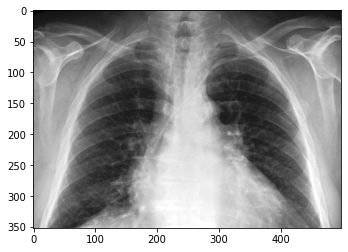

In [ ]:
bimage = brightness_changer(my_gray_img ,150 ).copy()
plot_image(bimage)

In [ ]:
getBright(bimage)

'brightness:149.29055426250457  min:30  max:255 pixcount:175296'

In [ ]:
def get_cont(image):
  row,col = image.shape
  cont = 0
  b= image.mean()

  pix_count = 0
  for i in range(row):
    for j in range(col):
      pix_count+=1
      cont += ((image[i][j] -b)* (image[i][j] -b) )

  cont= cont/pix_count
  cont= math.sqrt(cont)
  return cont



In [ ]:
print(get_cont(my_gray_img))
print (get_cont(bimage))

56.27778343445561
56.25364710701729


In [ ]:
def lin_change_cont(image , c):
  newimg=image.copy()
  row,col = image.shape
  cont = 0
  alpha = c/get_cont(image)
  b= image.mean()
  print(alpha)
  for i in range(row):
    for j in range(col):

      newimg[i][j] = (alpha * (image[i][j]-b))+b
      if newimg[i][j] >255 : newimg[i][j] = 255
      if newimg[i][j]<0 : newimg[i][j] = 0



  return newimg


In [ ]:
contimg= lin_change_cont(bimage,150).copy()

2.6664937779881024


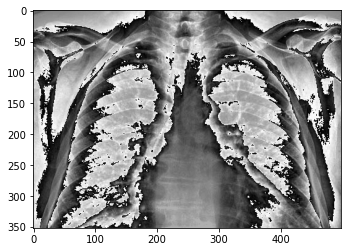

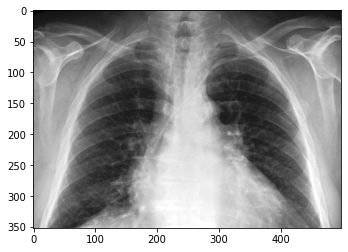

In [ ]:
plot_image(contimg)
plot_image(bimage)

In [ ]:
print(get_cont(contimg))
print(get_cont(bimage))

77.29242878476029
56.25364710701729


In [ ]:
def imgEnhancer(image,a,b):

  """this function recieves an image and changes the contrast and brightness to the passed wanted values
  variables:
  image - an image file
   a - int(0-255) for wanted new contrast level
   b - int(0-255) for wanted new brightness level"""
  curr_brightness = image.mean()
  curr_contrast = my_contrast(image)
  print(curr_contrast)
  edited_image = image
  print(edited_image.shape)
  print(image.shape)
  if b != curr_brightness :
   print("not same brightness")
   edited_image = (image + (b - curr_brightness))
   print(edited_image.mean())
   print(edited_image.shape)

   curr_brightness = edited_image.mean()
  if curr_contrast != a :
   alpha =  a/curr_contrast
   height , width = image.shape


  for row in range(height) :
   for col in range(width) :
  #  print(row , col)
    edited_image[row][col] = int((alpha * (image[row][col] - curr_brightness)) + curr_brightness)
  print(my_contrast(edited_image))
  return np.clip(edited_image , 0 ,255)



In [ ]:
nxtimg =